How can we prevent customers from leaving the company?

In order to find out we are going to build a logistic regression model and identify important factors. We are going to perform the following steps:

- Load the data 
- Preprocess the data  
- Perform a backward elemination of the features to filter out only the significant features 
- Identify reasons why customers are leaving 
- Propose solutions

In [ ]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

-- Packages import

In [1]:
# Basic packages you will need in case you're running this in a new notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

# Sklearn = Main Machine learning package
from sklearn import linear_model   
reg = linear_model.LinearRegression()
from sklearn.linear_model import LogisticRegression
%matplotlib
from IPython.display import HTML


Using matplotlib backend: MacOSX


-- Load the dataset 

In [2]:
data= pd.read_csv('ms_customers-2019-03-29.csv')
data.head()

,Customer Name,Service,MISN Number of Devices,MISV Number of Devices,MISW Number of Devices,VMS Number of Devices,NDDOS Number of Devices,BNSS Number of Devices,NSMIS Number of Devices,MERAKI Number of Devices,...,No compliancy comment,Request assign date,Customer request Date,Service installation date,MSC Name,Comment,Status,On Hold Date,Cancelled Date,Completed Date
0,Bank Of Montreal Day 2,NSMIS,0,0,0,0,0,0,NaN,0.0,...,NaN,2019-03-28,2019-03-28,2019-03-28,Ibrahima Ba,2019-03-28: validate OBD and sent it to MSCC f...,In Progress,NaN,NaN,NaN
1,Bank Of Nova Scotia Decommission Bnd Ontoro ...,MISN,2,0,0,0,0,0,0.0,0.0,...,NaN,2019-02-21,2018-10-02,2019-02-25,Ibrahima Ba,-Successful - Seeded in Spectrum -- landscape:...,Completed,NaN,NaN,2019-02-25
2,Geos Language Corporation,MERAKI,0,0,0,0,0,0,0.0,NaN,...,NaN,2019-03-21,2019-04-08,2019-04-08,Ibrahima Ba,21-03-2019: resource assignments request sent,In Progress,NaN,NaN,NaN
3,Workers Compensation Board Of Manitoba,NSMIS,0,0,0,0,0,0,NaN,0.0,...,NaN,2019-01-22,2019-01-03,NaN,Ibrahima Ba,2016-3-07: Following a call btw Alex and MScs ...,On Hold,2019-02-20,NaN,NaN
4,The Regional Municipality Of Durham,NDDOS,0,0,0,0,1,0,0.0,0.0,...,NaN,2019-01-23,2019-01-23,2019-02-04,Ibrahima Ba,2019-3-8: Follup with Steve Sheehan about read...,On Hold,2019-02-20,NaN,NaN


Generates descriptive statistics that summarize the central tendency

In [3]:
data.describe()

,MISN Number of Devices,MISV Number of Devices,MISW Number of Devices,VMS Number of Devices,NDDOS Number of Devices,BNSS Number of Devices,NSMIS Number of Devices,MERAKI Number of Devices,Cancelled Date
count,11.000000,11.0,11.0,11.0,11.000000,11.0,9.0,9.0,0.0
mean,0.454545,0.0,0.0,0.0,0.545455,0.0,0.0,0.0,NaN
std,0.820200,0.0,0.0,0.0,1.213560,0.0,0.0,0.0,NaN
min,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN
25%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN
50%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN
75%,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,NaN
max,2.000000,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,NaN


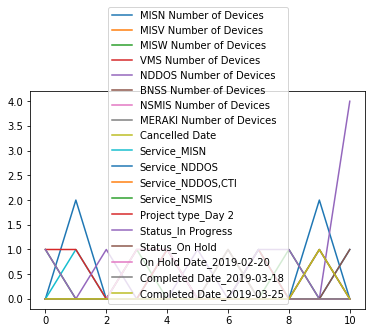

In [8]:
data.plot()

In [4]:
# Use .tail() and look at the target column
data.tail()

,Customer Name,Service,MISN Number of Devices,MISV Number of Devices,MISW Number of Devices,VMS Number of Devices,NDDOS Number of Devices,BNSS Number of Devices,NSMIS Number of Devices,MERAKI Number of Devices,...,No compliancy comment,Request assign date,Customer request Date,Service installation date,MSC Name,Comment,Status,On Hold Date,Cancelled Date,Completed Date
6,University Of New Brunswick Canadian Instit...,"NDDOS,CTI",0,0,0,0,1,0,0.0,0.0,...,NaN,2018-12-03,2019-02-15,2019-02-01,Ibrahima Ba,\r\nLast note from Customer(Pamela): as UNB re...,Completed,NaN,NaN,2019-03-18
7,Air Canada Day 2,MISN,1,0,0,0,0,0,0.0,0.0,...,NaN,2019-03-11,2019-03-27,2019-04-04,Ibrahima Ba,2019-03-11: \r\n- OBD review and deliverable/s...,In Progress,NaN,NaN,NaN
8,Pace Securities Corp.,NSMIS,0,0,0,0,0,0,0.0,0.0,...,NaN,2019-03-06,2019-05-25,2019-05-25,Ibrahima Ba,2019-03-12: 1st kickoff call held\r\n2019-03-...,In Progress,NaN,NaN,NaN
9,Air Canada Hong Kong Day 2,MISN,2,0,0,0,0,0,0.0,0.0,...,NaN,2019-02-28,2019-02-28,2019-03-22,Ibrahima Ba,ACC-HKHKG10-D0001-RTR001-EDG --seeding succesf...,Completed,NaN,NaN,2019-03-25
10,Openbet Technologies Limited,NDDOS,0,0,0,0,4,0,0.0,0.0,...,SIWB not up to date,2018-11-26,2019-01-15,NaN,Ibrahima Ba,2019-2-28: All completed on Bell's side. Cx ne...,On Hold,2019-01-25,NaN,NaN


In [5]:
data.corr()

,MISN Number of Devices,MISV Number of Devices,MISW Number of Devices,VMS Number of Devices,NDDOS Number of Devices,BNSS Number of Devices,NSMIS Number of Devices,MERAKI Number of Devices,Cancelled Date
MISN Number of Devices,1.000000,NaN,NaN,NaN,-0.273998,NaN,NaN,NaN,NaN
MISV Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MISW Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMS Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDDOS Number of Devices,-0.273998,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
BNSS Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NSMIS Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MERAKI Number of Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancelled Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can now investigate all available features Our target feature is "Churn". Let us convert all features in numeric ones:

In [9]:
for col in data.columns:
    if not np.issubdtype(data[col].dtype, np.number):
        if len(data[col].unique()) < 6:
            _dat = pd.get_dummies(data[col], prefix=col).iloc[:,1:]
            data = pd.concat([data, _dat], 1)
            data = data.drop(col, 1)
        else:
            if "Charges" in col:
                data[col] = pd.to_numeric(data[col].replace(" ", 0))

Y = data["Churn_Yes"]
X = data.drop(["Churn_Yes", "customerID"], 1)
X.head()

KeyError: 'Churn_Yes'

Backward Elimination
The idea is to remove independent variables that are not statistically significant.
For intance, if the dataset is huge, this could make a great difference, because your model can run with less data.

For backward elimination we are using an automated algorithm. We calculate the pvalues and drop the largest one if it is larger than our treshold(0.05) Otherwise we are finished



In [7]:
import statsmodels.api as sm

treshold=0.05
X2 = sm.add_constant(X.drop("TotalCharges", 1))
pdroplist=["TotalCharges"]

while True:
    ols = sm.OLS(Y, X2).fit()     #OLS` (ordinary least square regression)
    
    if ols.pvalues.max() > treshold:
        col = ols.pvalues.idxmax()
        print("Dropping "+str(col))
        X2 = X2.drop(col,1)
        pdroplist.append(col)
    else:
        break

NameError: name 'X' is not defined

Preprocessing (The sklearn.preprocessing module includes scaling, centering, normalization, binarization and imputation methods.)
Next we are preprocessing our data. Therefore we are replacing NaNs with the respective mean value and we are standardizing our data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, StandardScaler

X3=X2.drop("const",1)

imputer = Imputer()
X3 = imputer.fit_transform(X3)  #fill missing values with mean column values

scaler = StandardScaler()
X3 = scaler.fit_transform(X3)   #Standardize features by removing the mean and scaling to unit variance

In order to be able to assess the accuracy of our model we are using a train-test split.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X3, Y, test_size=0.2, random_state=3)

In [10]:
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg.fit(X_train, Y_train)

acc = accuracy_score(Y_val, reg.predict(X_val))
print("Accuracy: "+str(acc))

NameError: name 'X_train' is not defined

We can see that the two main features that distiguish the generated groups are tenure and the total charges.

We can now see that the main factors are
Tenure:
  -- Long time customers are less likely to leave the company.
  -- Loyality
TotalCharges:
  -- More paying customers are more likely to leave the company.
